# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Bin Ware

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
import requests
import spacy
from bs4 import BeautifulSoup
from html import unescape
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import re

# Load spaCy model and add SpacyTextBlob to pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')


### Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
article_url = "https://en.wikipedia.org/wiki/Ethiopia"
response = requests.get(article_url)

if response.status_code == 200:
    with open('ethiopia_article.html', 'w', encoding='utf-8') as f:
        f.write(response.text)
    print("HTML content saved to ethiopia_article.html")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")


HTML content saved to ethiopia_article.html


### Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [4]:
with open('ethiopia_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

# Remove scripts and styles
for script_or_style in soup(['script', 'style']):
    script_or_style.decompose()

# Extract main text
text = soup.get_text(separator=" ", strip=True)
text = unescape(text)
text = re.sub(r'\s+', ' ', text)

# Process text with spaCy
doc = nlp(text)

# Polarity of entire article
article_polarity = doc._.blob.polarity

# Number of sentences
num_sentences = len(list(doc.sents))

print(f"Article Polarity Score: {article_polarity:.3f}")
print(f"Number of Sentences in the Article: {num_sentences}")


Article Polarity Score: 0.074
Number of Sentences in the Article: 2371


### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [5]:
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
token_counts = Counter(tokens)

most_common_tokens = token_counts.most_common(5)
print("Top 5 Most Frequent Tokens:")
for t, f in most_common_tokens:
    print(f"Token: '{t}' - Frequency: {f}")


Top 5 Most Frequent Tokens:
Token: 'ethiopia' - Frequency: 486
Token: '^' - Frequency: 373
Token: 'ethiopian' - Frequency: 207
Token: 'retrieved' - Frequency: 178
Token: 'world' - Frequency: 77


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [6]:
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
lemma_counts = Counter(lemmas)
most_common_lemmas = lemma_counts.most_common(5)

print("Top 5 Most Frequent Lemmas:")
for l, f in most_common_lemmas:
    print(f"Lemma: '{l}' - Frequency: {f}")


Top 5 Most Frequent Lemmas:
Lemma: 'ethiopia' - Frequency: 486
Lemma: '^' - Frequency: 373
Lemma: 'ethiopian' - Frequency: 207
Lemma: 'retrieve' - Frequency: 178
Lemma: 'country' - Frequency: 96


### Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

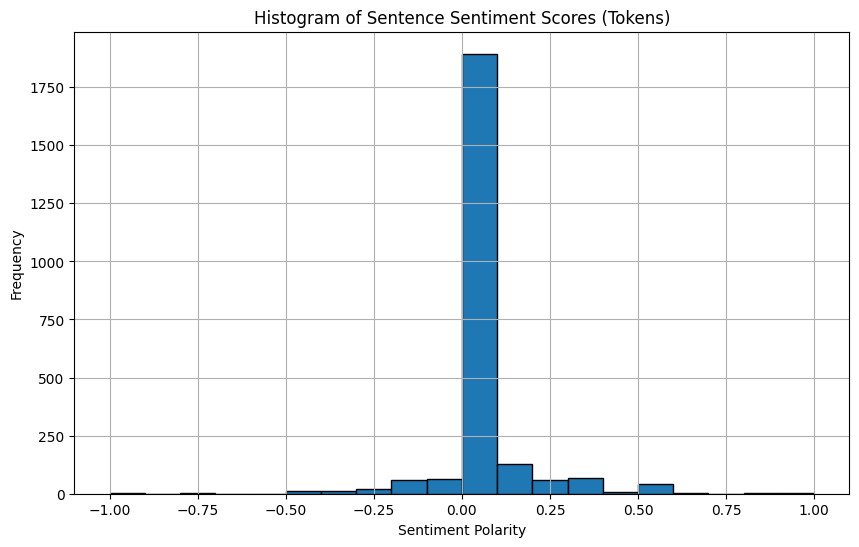

In [ ]:
sentence_scores_tokens = []
for sent in doc.sents:
    # Sentiment using the sentence text directly
    sentence_scores_tokens.append(sent._.blob.polarity)

plt.figure(figsize=(10,6))
plt.hist(sentence_scores_tokens, bins=20, edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores (Tokens)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

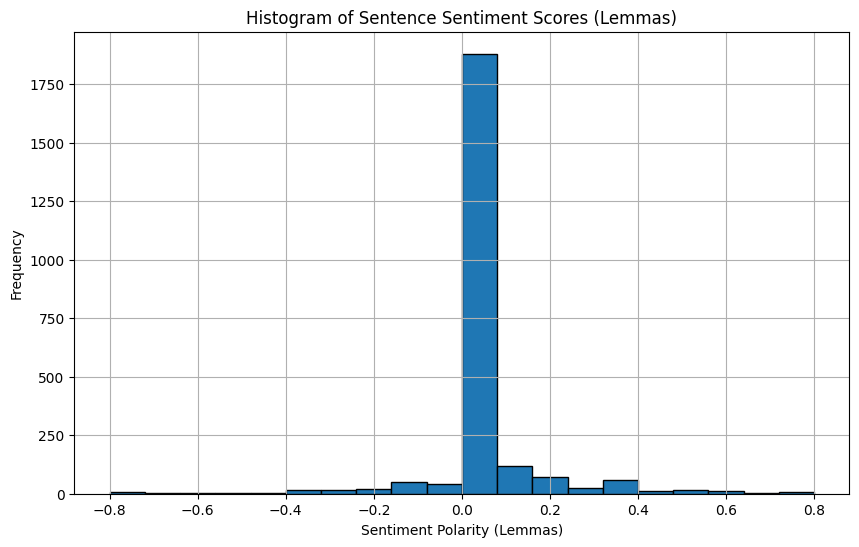

In [ ]:
sentence_scores_lemmas = []
for sent in doc.sents:
    sent_lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
    lemmatized_sent = " ".join(sent_lemmas)
    lemma_doc = nlp(lemmatized_sent)
    sentence_scores_lemmas.append(lemma_doc._.blob.polarity)

plt.figure(figsize=(10,6))
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores (Lemmas)")
plt.xlabel("Sentiment Polarity (Lemmas)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

-- Cutoff Score (tokens): 0.05
-- Cutoff Score (lemmas): 0.05

### Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
token_cutoff = 0.05  # adjust if needed
summary_sentences_token = []
for sent in doc.sents:
    polarity = sent._.blob.polarity
    # Basic filter: sentence longer than 10 words and polarity above cutoff
    if polarity > token_cutoff and len(sent.text.split()) > 10:
        summary_sentences_token.append(sent.text.strip())

summary_token = ' '.join(summary_sentences_token[:10])  # up to 10 sentences
print("Token-based Summary:")
print(summary_token)


Token-based Summary:
Ethiopia - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Pages for logged out editors learn more Contributions Talk Contents move to sidebar hide (Top) 1 Etymology 2 History Toggle History subsection 2.1 Prehistory 2.2 Antiquity 2.3 Middle Ages 2.4 Early Modern Period (1632–1855) 2.5 Age of Imperialism (1855–1916) 2.6 Haile Selassie I era (1916–1974) 2.7 Derg era (1974–1991) 2.8 Federal Democratic Republic (1991–present) 3 Geography Toggle Geography subsection 3.1 What links here Related changes Upload file Special pages Permanent link Page information Cite this page Get shortened URL Download QR code Print/export Download as PDF Printable version In other projects Wikimedia Commons Wikinew

### Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
summary_doc_token = nlp(summary_token)
summary_token_polarity = summary_doc_token._.blob.polarity
summary_token_sent_count = len(list(summary_doc_token.sents))

print(f"Token Summary Polarity Score: {summary_token_polarity:.3f}")
print(f"Number of Sentences in Token-based Summary: {summary_token_sent_count}")


Token Summary Polarity Score: 0.155
Number of Sentences in Token-based Summary: 10


### Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [11]:
lemma_cutoff = 0.05  # adjust if needed
summary_sentences_lemma = []
for sent in doc.sents:
    sent_lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
    lemmatized_sent = " ".join(sent_lemmas)
    lemma_doc = nlp(lemmatized_sent)
    lemma_polarity = lemma_doc._.blob.polarity
    
    if lemma_polarity > lemma_cutoff and len(sent.text.split()) > 10:
        summary_sentences_lemma.append(sent.text.strip())

summary_lemma = ' '.join(summary_sentences_lemma[:10])
print("Lemma-based Summary:")
print(summary_lemma)


Lemma-based Summary:
Antiquity 2.3 Middle Ages 2.4 Early Modern Period (1632–1855) 2.5 Age of Imperialism (1855–1916) 2.6 Haile Selassie I era (1916–1974) 2.7 Derg era (1974–1991) 2.8 Federal Democratic Republic (1991–present) 3 Geography Toggle Geography subsection 3.1 What links here Related changes Upload file Special pages Permanent link Page information Cite this page Get shortened URL Download QR code Print/export Download as PDF Printable version In other projects Wikimedia Commons Wikinews Wikiquote Wikivoyage Wikidata item Appearance move to sidebar hide Coordinates : 9°00′N 38°42′E ﻿ / ﻿ 9°N 38.7°E ﻿ / 9; 38.7 From Wikipedia, the free encyclopedia Country in the Horn of Africa This article is about the country. Capital and largest city Addis Ababa 9°1′N 38°45′E ﻿ / ﻿ 9.017°N 38.750°E ﻿ / 9.017; 38.750 Official languages Amharic Afar Oromo Somali Tigrinya [ 1 ] [ 2 ] [ 3 ] Regional languages [ 4 ] Harari Sidama Languages of Ethiopia Ethnic groups (2007 [ 5 ] [ 6 ] ) 34.5% Orom

### Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [12]:
summary_doc_lemma = nlp(summary_lemma)
summary_lemma_polarity = summary_doc_lemma._.blob.polarity
summary_lemma_sent_count = len(list(summary_doc_lemma.sents))

print(f"Lemma Summary Polarity Score: {summary_lemma_polarity:.3f}")
print(f"Number of Sentences in Lemma-based Summary: {summary_lemma_sent_count}")


Lemma Summary Polarity Score: 0.096
Number of Sentences in Lemma-based Summary: 10


### Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The original article had a polarity score of approximately 0.074, while the token-based summary had a polarity score of about 0.155 and the lemma-based summary had a polarity score of around 0.096. These differences suggest that by filtering sentences based on a chosen sentiment cutoff, we ended up selecting slightly more positive (or at least less neutral) content for the summaries. The summaries may exclude more neutral or negative parts of the article, thus skewing their overall polarity scores. In other words, we cherry-picked sentences that meet our positivity cutoff, resulting in a more positive overall sentiment compared to the original text.

### Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Both summaries are quite similar in content and sentiment since the article is primarily neutral in tone. However, the token-based summary might retain slightly more contextually rich sentences (because we used the original token-based text), potentially making it a bit clearer. The lemma-based summary’s selection criteria can sometimes lead to sentences that are a bit more fragmented if lemmas change the nuances of sentiment. Overall, given the neutrality of Wikipedia content, there may not be a significant difference, but I would lean slightly towards the token-based summary for clarity and coherence.